# Introduction to CNN and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithms which can discover patter s in virtual data, such as camera of a self-driving car recognizing the car in frot.


In [1]:
# gettindg the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-05-18 12:00:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   114MB/s    in 0.9s    

2021-05-18 12:00:41 (114 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
# Unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

# 0. Visualizing Images

In [3]:
# getting class names
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
# create a list of class names
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
print(class_names)


['pizza' 'steak']


In [4]:
# visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir+'/'+target_class

    # get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # read image and plot
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')

    return img

['1190233.jpg']
Image shape: (382, 512, 3)


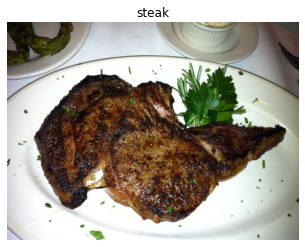

In [5]:
img = view_random_image('pizza_steak/train',
                        'steak')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 74,  69,  76],
        [ 74,  69,  76],
        [ 73,  68,  75],
        ...,
        [221, 197, 133],
        [217, 192, 128],
        [217, 189, 124]],

       [[ 73,  68,  75],
        [ 72,  67,  74],
        [ 70,  65,  72],
        ...,
        [221, 193, 128],
        [212, 184, 119],
        [206, 177, 111]],

       [[ 73,  68,  75],
        [ 71,  66,  73],
        [ 69,  64,  71],
        ...,
        [210, 179, 112],
        [199, 168, 101],
        [193, 160,  91]],

       ...,

       [[ 37,  35,  36],
        [ 44,  42,  43],
        [ 52,  50,  51],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]],

       [[ 35,  33,  34],
        [ 41,  39,  40],
        [ 49,  47,  48],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]],

       [[ 32,  30,  31],
        [ 37,  35,  36],
        [ 44,  42,  43],
        ...,
        [ 16,  16,  2

In [ ]:
# get all the pixel values between zero and one
img/255.

array([[[0.29019608, 0.27058824, 0.29803922],
        [0.29019608, 0.27058824, 0.29803922],
        [0.28627451, 0.26666667, 0.29411765],
        ...,
        [0.86666667, 0.77254902, 0.52156863],
        [0.85098039, 0.75294118, 0.50196078],
        [0.85098039, 0.74117647, 0.48627451]],

       [[0.28627451, 0.26666667, 0.29411765],
        [0.28235294, 0.2627451 , 0.29019608],
        [0.2745098 , 0.25490196, 0.28235294],
        ...,
        [0.86666667, 0.75686275, 0.50196078],
        [0.83137255, 0.72156863, 0.46666667],
        [0.80784314, 0.69411765, 0.43529412]],

       [[0.28627451, 0.26666667, 0.29411765],
        [0.27843137, 0.25882353, 0.28627451],
        [0.27058824, 0.25098039, 0.27843137],
        ...,
        [0.82352941, 0.70196078, 0.43921569],
        [0.78039216, 0.65882353, 0.39607843],
        [0.75686275, 0.62745098, 0.35686275]],

       ...,

       [[0.14509804, 0.1372549 , 0.14117647],
        [0.17254902, 0.16470588, 0.16862745],
        [0.20392157, 0

# 0. Building and end-to-end CNN Model

What we have to do:

1. Load our images
2. Preprocess our images
    - rescaling
    - turn our data into batches (small subset of the dataset that a model look at during traininh)
3. Build a CNN to find patterns in them
4. Compile our CNN
5. Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all values  btw 0 and 1)

train_datagen = ImageDataGenerator(rescale =1./255) # generates batches of tensor image data with real-time data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data dirs
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # target directory of images
                                              batch_size=32,          # size of minibatches to load data into  
                                              target_size=(244,244),  # target size of images (height, width)
                                              class_mode='binary',    # type of data we're working with
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(244,244),
                                              class_mode='binary',
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# build CNN model - tiny VGG
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(244,244,3)),
                                      tf.keras.layers.Conv2D(10,3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding='valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding='valid'),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
                                      
                                      
])

In [ ]:
# compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6261 - accuracy: 0.6305 - val_loss: 0.4312 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4399 - accuracy: 0.7956 - val_loss: 0.3631 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4039 - accuracy: 0.8289 - val_loss: 0.3438 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3506 - accuracy: 0.8438 - val_loss: 0.3142 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.2770 - accuracy: 0.8872 - val_loss: 0.3315 - val_accuracy: 0.8620


# 1. Binary Classification

## 1.1. Visualize the Data

['2357281.jpg']
Image shape: (512, 512, 3)
['147785.jpg']
Image shape: (512, 384, 3)


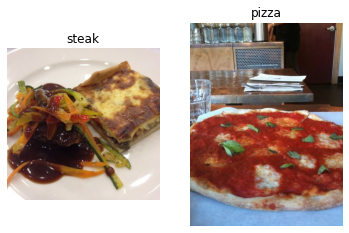

In [7]:
# visualize a sample of data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 1.2. Preprocess the data

In [8]:
# Defining the training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [10]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed =42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
# looking at the length of a sample of the training batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [14]:
# first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

## 1.3. Creating a baseline CNN model

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
base_model = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(244,244,3)), # input layer
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # ouput layer
])